# CASE STUDY : 6

# DATA PREPROCESSING

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stat
warnings.filterwarnings("ignore")

# 1. Load the dataset into python environment

In [3]:
data = pd.read_csv('titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 2. Make ‘PassengerId’ as the index column

In [110]:
data = pd.read_csv('titanic_dataset.csv', index_col = 'PassengerId')

In [111]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3. Check the basic details of the dataset

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [114]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [115]:
total_missing = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data['Survived'].count()*100).sort_values(ascending=False)
missing_df = pd.concat([total_missing, percent], keys=['total missing values','percentage'],axis=1)
missing_df

,total missing values,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


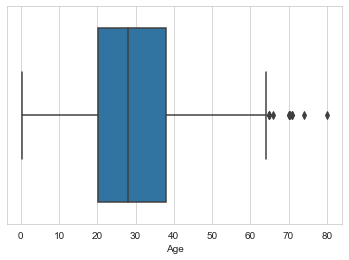

In [116]:
sns.boxplot(data['Age'])
plt.show()

Since there are outliers we cannot use the mean for replacing the missing values

<AxesSubplot:xlabel='Age', ylabel='Density'>

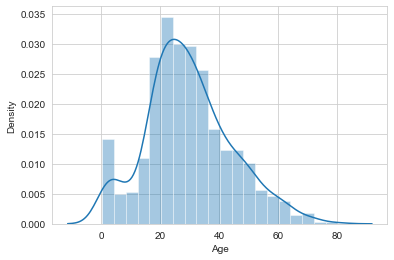

In [117]:
sns.distplot(data['Age'])

In [118]:
print('Skewness of Age is: ',stat.skew(data['Age'].dropna(axis=0)))

Skewness of Age is:  0.3882898514698657


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

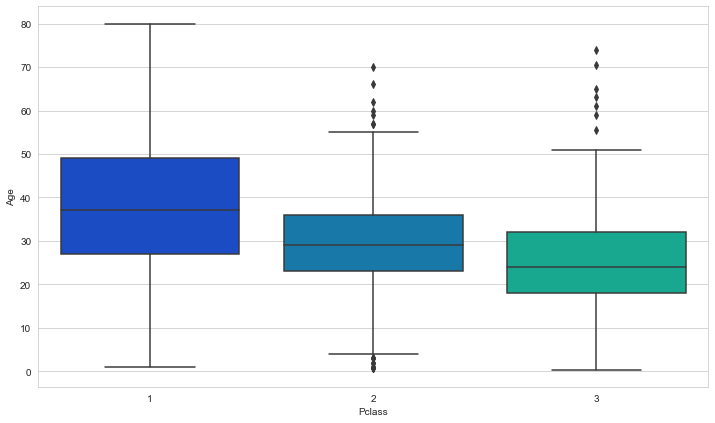

In [119]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [120]:
data.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [121]:
data.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [122]:
def impute_age(x):
    age = x[0]
    pclass = x[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 35
        else:
            return 28
    else:
        return age
        
            

In [123]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [124]:
data['Age'].isna().sum()

0

Both are categorical variables.

We can use mode for replacing such missing values.

In [126]:
em = data['Embarked']

In [127]:
em.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [129]:
m = em.mode()

In [130]:
m

0    S
dtype: object

In [131]:
em.fillna(value ='S', axis=0,inplace=True)

In [132]:
em.isna().sum()

0

In [133]:
data.drop(['Cabin'], axis=1, inplace=True)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

In [135]:
q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)
iqr_age = q3_age - q1_age
uplim_age = q3_age + (1.5*iqr_age)
lowlim_age = q1_age - (1.5*iqr_age)
out_age = []
for x in data['Age']:
    if (x>uplim_age) or (x<lowlim_age):
        out_age.append(x)
print(out_age)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


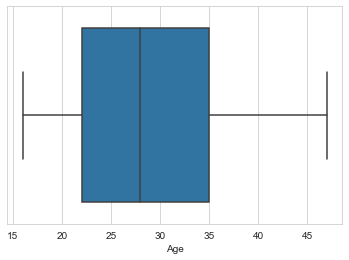

In [136]:
p10_age = np.percentile(data['Age'], 10)
p90_age = np.percentile(data['Age'], 90)
for x in data['Age']:
    if (x<p10_age):
        data['Age'].replace(x, p10_age, inplace=True)
    elif (x>p90_age):
        data['Age'].replace(x, p90_age, inplace=True)

sns.boxplot(data['Age'])
plt.show()

In [137]:
q1_f = np.percentile(data['Fare'], 25)
q3_f = np.percentile(data['Fare'], 75)
iqr_f = q3_f - q1_f
uplim_f = q3_f + (1.5*iqr_f)
lowlim_f = q1_f - (1.5*iqr_f)
out_f = []
for x in data['Fare']:
    if (x<lowlim_f) or (x>uplim_f):
        out_f.append(x)
print(out_f)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


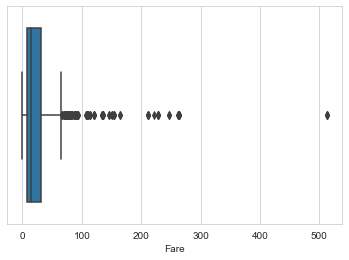

In [138]:
sns.boxplot(data['Fare'])
plt.show()

In [139]:
print(max(data['Fare']))
print(uplim_f)

512.3292
65.6344


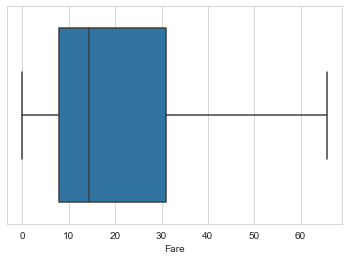

In [140]:
for x in data['Fare']:
    if (x>uplim_f):
        data['Fare'].replace(x, uplim_f, inplace=True)
    elif (x<lowlim_f):
        data['Fare'].replace(x, lowlim_f, inplace=True)
sns.boxplot(data['Fare'])
plt.show()

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


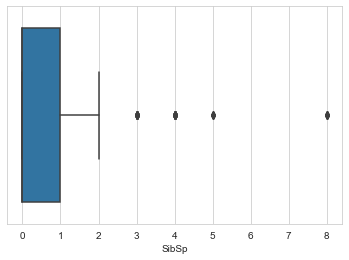

In [141]:
q1_s = np.percentile(data['SibSp'], 25)
q3_s = np.percentile(data['SibSp'], 75)
iqr_s = q3_s - q1_s
uplim_s = q3_s + (1.5*iqr_s)
lowlim_s = q1_s - (1.5*iqr_s)

out_s = []
for x in data['SibSp']:
    if (x<lowlim_s) or (x>uplim_s):
        out_s.append(x)
print(out_s)

sns.boxplot(data['SibSp'])
plt.show()

In [142]:
for x in data['SibSp']:
    if x>uplim_s:
        data['SibSp'].replace(x, uplim_s, inplace=True)

<AxesSubplot:xlabel='SibSp'>

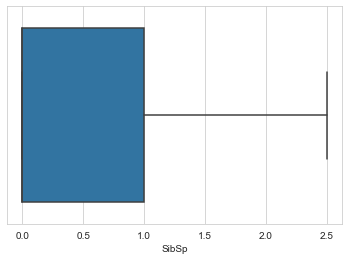

In [143]:
sns.boxplot(data['SibSp'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [174]:
data.dtypes

Survived      int64
Pclass        int64
Sex           uint8
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [177]:
y = data['Survived']
x = data.drop(['Survived', 'Sex', 'Fare','Age', 'Embarked'], axis=1)

In [178]:
x.describe()

,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000
mean,2.308642,0.426487,0.381594
std,0.836071,0.708246,0.806057
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,2.500000,6.000000


In [179]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [180]:
x = pd.DataFrame(x)
x.describe()

,0,1,2
count,891.000000,891.000000,891.000000
mean,0.654321,0.170595,0.063599
std,0.418036,0.283298,0.134343
min,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.400000,0.000000
max,1.000000,1.000000,1.000000


In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test, predictions))
from sklearn.metrics import r2_score
print('R squared value is', r2_score(y_test, predictions))

MSE is 0.20322768514494927
R squared value is 0.16195389192672838
